In [1]:
import os
os.chdir('/content/drive/MyDrive/MS_ML')

In [4]:
import pandas as pd
df = pd.read_csv('data_banknote_authentication.csv',names =['col1','col2','col3','col4','target']  ,header=None)
# Class (0 for authentic, 1 for inauthentic)
print(df)

         col1      col2     col3     col4  target
0     3.62160   8.66610  -2.8073 -0.44699       0
1     4.54590   8.16740  -2.4586 -1.46210       0
2     3.86600  -2.63830   1.9242  0.10645       0
3     3.45660   9.52280  -4.0112 -3.59440       0
4     0.32924  -4.45520   4.5718 -0.98880       0
...       ...       ...      ...      ...     ...
1367  0.40614   1.34920  -1.4501 -0.55949       1
1368 -1.38870  -4.87730   6.4774  0.34179       1
1369 -3.75030 -13.45860  17.5932 -2.77710       1
1370 -3.56370  -8.38270  12.3930 -1.28230       1
1371 -2.54190  -0.65804   2.6842  1.19520       1

[1372 rows x 5 columns]


In [5]:
# Cheking null values
print(df.isnull().sum())

col1      0
col2      0
col3      0
col4      0
target    0
dtype: int64


In [20]:
import numpy as np
class naive_bayes:
  def __init__(self):
    self.weights = dict()
  
  def fit(self,
          x,y):
    y = np.array(y)
    x = np.array(x)

    for class_num in set(y):

      data_class_index = np.where(y == class_num)[0]
      seperated_Class_features = x[data_class_index]
      # standard deviation = sqrt((sum i to N (x_i – mean(x))^2) / N-1)
      summaries = [(np.mean(column), np.std(column)) for column in zip(*seperated_Class_features)]
      # print(summaries)
      self.weights[class_num] = summaries

  # Also can be used to dinf standard deviation
  # def std(self, numbers):
  ## standard deviation = sqrt((sum i to N (x_i – mean(x))^2) / N-1)
  #   avg = mean(numbers)
  #   variance = sum([pow(x - avg, 2) for x in numbers]) / float(len(numbers) - 1)
  #   return math.sqrt(variance)

  def calculate_gaussian_probability(self, x, mean, stdev):
  # f(x) = (1 / sqrt(2 * PI) * sigma) * exp(-((x-mean)^2 / (2 * sigma^2)))
    exponent = np.exp(-((x-mean)**2 / (2 * stdev**2 )))
    return (1 / (np.sqrt(2 * np.pi) * stdev)) * exponent

  def calculate_class_probabilities(self, summaries, row):
  # P(class|data) = P(X|class) * P(class)

    probabilities = {}
    for classValue, classSummaries in summaries.items():
        probabilities[classValue] = 1
        for i in range(len(classSummaries)):
            mean, std_dev = classSummaries[i]
            x = row[i]
            probabilities[classValue] *= self.calculate_gaussian_probability(x, mean, std_dev)
    return list(probabilities.values())
    
  def predict(self, X):
    X = np.array(X)
    predictions = np.array([])
    for x in X:
      probabilities = self.calculate_class_probabilities(self.weights , x)
      class_predicted = np.argmax(probabilities, axis = 0)
      predictions = np.append(predictions, class_predicted)
    # return best_label
    return predictions

In [21]:
X = df.iloc[:,:-1] #selection features and droping last column
y = df.iloc[:,-1] # selection last columns as label/target

In [22]:
from sklearn.model_selection import train_test_split
# Split into training and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=42)

In [23]:
naive_bayes_predictor = naive_bayes()
naive_bayes_predictor.fit(X_train,y_train)

In [24]:
# to see weights/ summeries of training dataset against each class
# it contains every column's/feature's (mean, standard deviation)
print(naive_bayes_predictor.weights)

{0: [(2.2845944008143326, 2.0365978826978552), (4.184853689767427, 5.1753356432372675), (0.8338013749022801, 3.226258961311379), (-1.1589116099348533, 2.131358347088455)], 1: [(-1.9216445881987578, 1.8064188076579233), (-1.21019966252588, 5.414763719829967), (2.3639610931677018, 5.302394393024846), (-1.2148800360248448, 2.027074936055376)]}


In [25]:
# Function to print out comparision of model prediction and true labels
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns
def validation(y_true,y_pred):
  auc=accuracy_score(y_true,y_pred)
  print('Testing accuracy of the model:',np.round(auc,2)) #accuracy of results
  print('Confuction matrix')
  cm = confusion_matrix(y_true,y_pred)
  print(cm) #confusion matrix of result

  unique, counts = np.unique(y_true, return_counts=True)
  ax = sns.heatmap(cm/counts, annot=True, 
              fmt='.2%', cmap='Blues')

  ax.set_title(' Confusion Matrix')
  ax.set_xlabel('\nPredicted Values')
  ax.set_ylabel('Actual Values ')
  print(classification_report(y_true,y_pred, target_names=['authentic','inauthentic'])) #classification report
  return auc

Testing accuracy of the model: 0.86
Confuction matrix
[[539  75]
 [ 83 400]]
              precision    recall  f1-score   support

   authentic       0.87      0.88      0.87       614
 inauthentic       0.84      0.83      0.84       483

    accuracy                           0.86      1097
   macro avg       0.85      0.85      0.85      1097
weighted avg       0.86      0.86      0.86      1097



0.8559708295350957

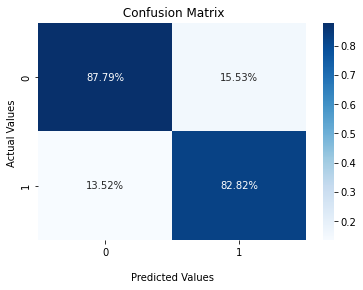

In [27]:
# training evaluate metrics
y_pred = naive_bayes_predictor.predict(X_train)
#Checking the accuracy
validation(y_train, y_pred)

Testing accuracy of the model: 0.81
Confuction matrix
[[131  17]
 [ 36  91]]
              precision    recall  f1-score   support

   authentic       0.78      0.89      0.83       148
 inauthentic       0.84      0.72      0.77       127

    accuracy                           0.81       275
   macro avg       0.81      0.80      0.80       275
weighted avg       0.81      0.81      0.81       275



0.8072727272727273

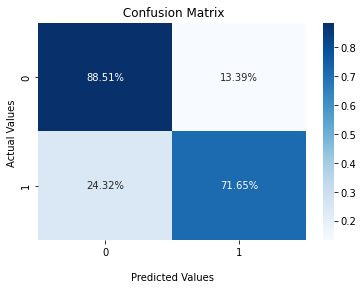

In [28]:
# test evaluate metrics
y_pred = naive_bayes_predictor.predict(X_test)
#Checking the accuracy
validation(y_test, y_pred)